In [1]:
import ptc_track.madx_configuration as configuration
import ptc_track.matrix_indexes as indexes
import ptc_track.particles_trajectory_generator as transporter
import ptc_track.extrapolation_xa_transport as extrapolated_transport
import visualization.visualize as plotter
import data.bunch_configuration as buc
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
sns.set_style("whitegrid")

Change below path for path to unziped folder

In [3]:
path_to_project = "/home/rafalmucha/Pobrane/optic"

In [4]:
folder_name = "2017_matched1"
xml_file_name = "configuration_reco_beam1.xml"
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 2
track_configuration_xa1 = configuration.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [5]:
folder_name = "2017_matched2"
xml_file_name = "configuration_reco_beam1.xml"
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 2
track_configuration_xa2 = configuration.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [10]:
folder_name = "2017_matched"
xml_file_name = "configuration_reco_beam1.xml"
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 2
track_configuration = configuration.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [11]:
x_mean = 0
sigma_x = 0
theta_x_mean = 0
sigma_theta_x = 0
y_mean = 0
sigma_y = 0
theta_y_mean = 0
sigma_theta_y = 0
pt_mean = -0.15
sigma_pt = 0.15

x_resolution = 1
theta_x_resolution = 1
y_resolution = 1
theta_y_resolution = 1
pt_resolution = 131

bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, x_resolution,
                                                       theta_x_mean, sigma_theta_x, theta_x_resolution,
                                                       y_mean, sigma_y, y_resolution,
                                                       theta_y_mean, sigma_theta_y, theta_y_resolution,
                                                        pt_mean, sigma_pt, pt_resolution)

In [12]:
title_sufix = "2017 nominal, track"

In [13]:
segments = transporter.generate_from_range(madx_configuration=track_configuration, bunch_configuration=bunch_configuration)

In [10]:
import data.particles_generator as pg
particles = pg.generate_from_range(bunch_configuration)

In [11]:
segments_extrapolated = extrapolated_transport.transport(particles, 190, track_configuration_xa1, 120, track_configuration_xa2, 140)

In [12]:
matrix = segments["end"]

In [13]:
alt_matrix = segments_extrapolated["end"]

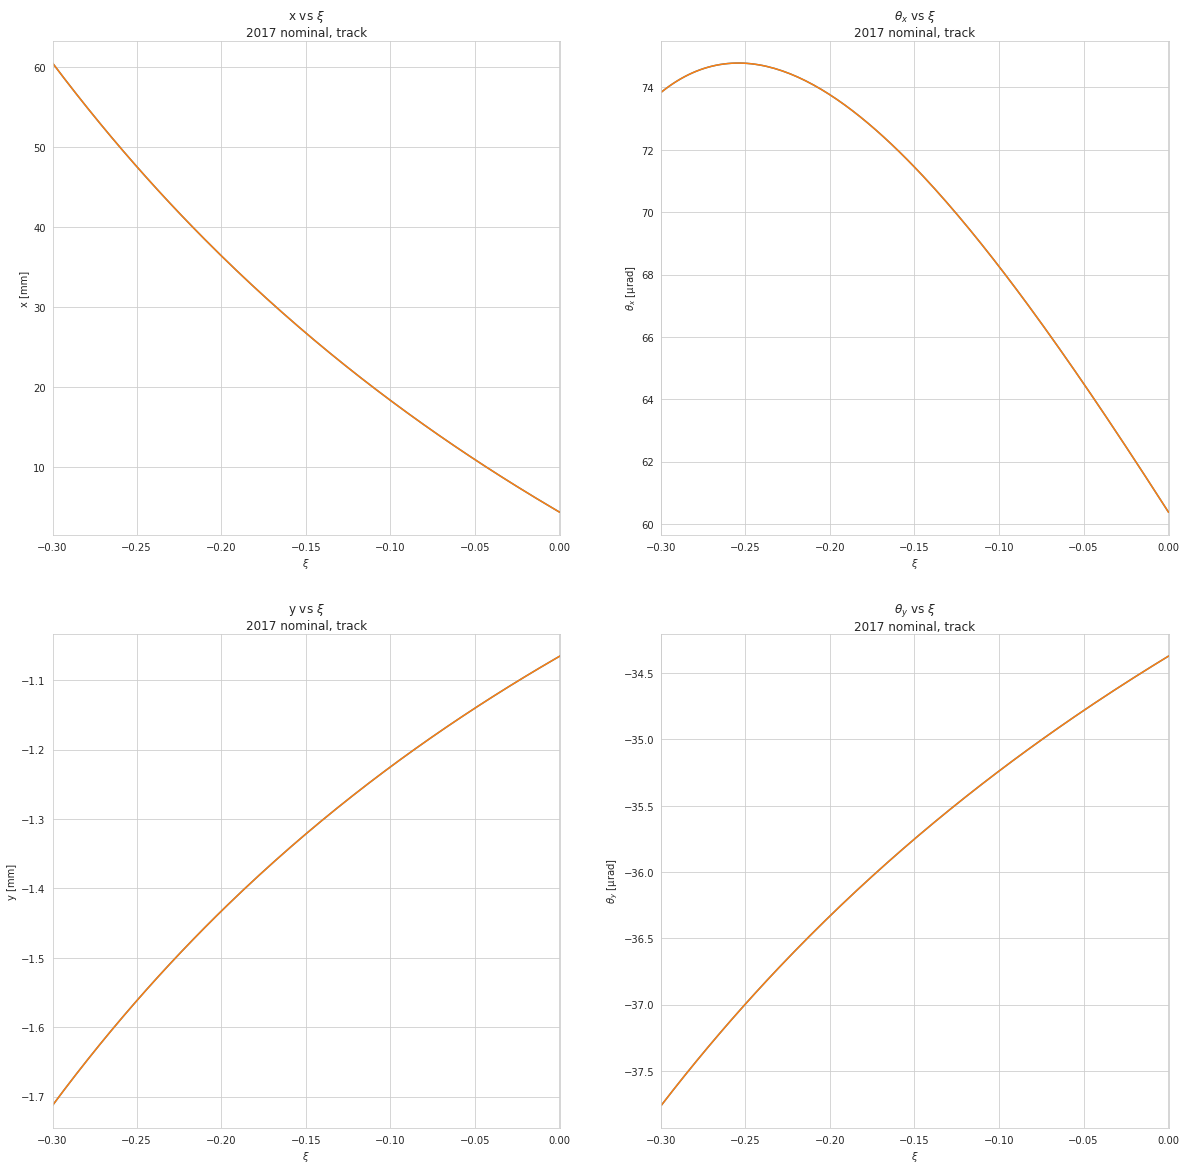

In [14]:
f, axes = plt.subplots(2, 2)

fig = plt.gcf()
fig.set_size_inches(20,20)

mapping = indexes.ptc_track

plotter.plot_from_one_matrix("pt", "x", matrix, mapping, axes, 0, 0, title_sufix)
plotter.plot_from_one_matrix("pt", "x", alt_matrix, mapping, axes, 0, 0, title_sufix)
plotter.plot_from_one_matrix("pt", "theta x", matrix, mapping, axes, 0, 1, title_sufix)
plotter.plot_from_one_matrix("pt", "theta x", alt_matrix, mapping, axes, 0, 1, title_sufix)
plotter.plot_from_one_matrix("pt", "y", matrix, mapping, axes, 1, 0, title_sufix)
plotter.plot_from_one_matrix("pt", "y", alt_matrix, mapping, axes, 1, 0, title_sufix)
plotter.plot_from_one_matrix("pt", "theta y", matrix, mapping, axes, 1, 1, title_sufix)
plotter.plot_from_one_matrix("pt", "theta y", alt_matrix, mapping, axes, 1, 1, title_sufix)

In [15]:
matrix

array([[ 1.00000000e+00,  1.00000000e+00,  6.05134427e-02, ...,
        -2.99712394e-01,  2.19550000e+02,  6.50000000e+03],
       [ 2.00000000e+00,  1.00000000e+00,  5.98662067e-02, ...,
        -2.97404702e-01,  2.19550000e+02,  6.50000000e+03],
       [ 3.00000000e+00,  1.00000000e+00,  5.92238357e-02, ...,
        -2.95097010e-01,  2.19550000e+02,  6.50000000e+03],
       ...,
       [ 1.29000000e+02,  1.00000000e+00,  4.87434819e-03, ...,
        -4.32777904e-03,  2.19550000e+02,  6.50000000e+03],
       [ 1.30000000e+02,  1.00000000e+00,  4.58655716e-03, ...,
        -2.02008673e-03,  2.19550000e+02,  6.50000000e+03],
       [ 1.31000000e+02,  1.00000000e+00,  4.30029700e-03, ...,
         2.87605578e-04,  2.19550000e+02,  6.50000000e+03]])

In [25]:
def transporter_extrapolation(madx_configuration, particles):
    segments_extrapolated = extrapolated_transport.transport(particles, 100, track_configuration_xa1, 120, track_configuration_xa2, 140)
    return segments_extrapolated

In [26]:
import comparators.transport as transport_compare
import ptc_track.particles_trajectory_generator as ptg

In [27]:
transporters = {
    "extrapolation": (transporter_extrapolation, None, mapping),
    "normal_transport": (ptg.transport, track_configuration, mapping)
}

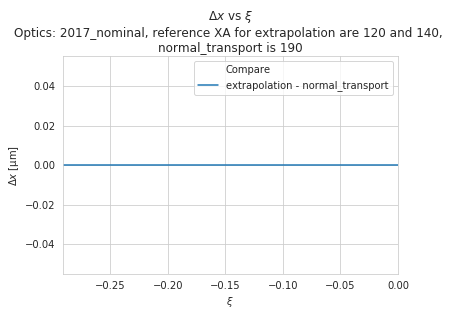

In [28]:
title_sufix = "Optics: 2017_nominal, reference XA for extrapolation are 120 and 140, \nnormal_transport is 190"
transport_compare.compare(bunch_configuration, transporters, "x", "pt", title_sufix=title_sufix)

In [20]:
|

SyntaxError: invalid syntax (<ipython-input-20-4b37ef281455>, line 1)